https://archive.ics.uci.edu/ml/datasets/Low+Resolution+Spectrometer

In [14]:
import numpy as np
import pandas as pd

data = pd.read_csv('lrs.csv', index_col=0)
x  = np.asarray(data.iloc[:, 10:53])
wl = np.asarray(list(map(float, data.columns[10:53])))

In [15]:
import matplotlib
import matplotlib.pyplot as plt

In [18]:
wl.shape

(43,)

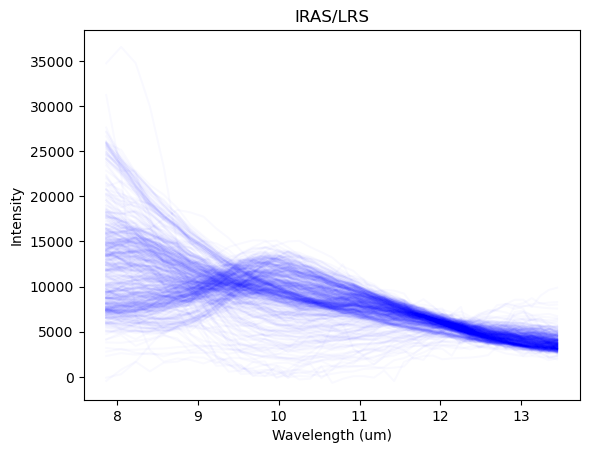

In [16]:
plt.figure()
plt.title("IRAS/LRS")
plt.xlabel("Wavelength (um)")
plt.ylabel("Intensity")
for i in range(x.shape[0]):
    plt.plot(wl, x[i], alpha=0.025, color='blue')
plt.show()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
z = pca.fit_transform(x)

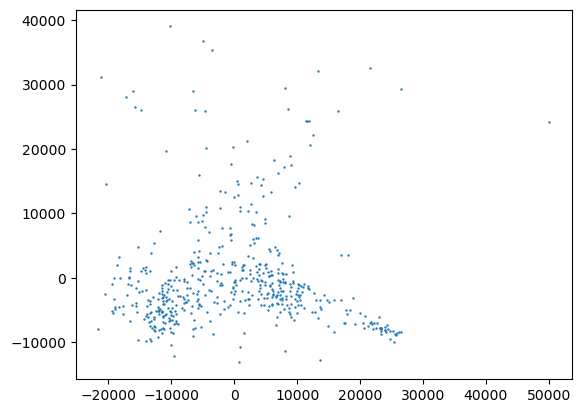

In [5]:
plt.figure()
plt.scatter(z[:,0],z[:,1],s=0.5)
plt.show()

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
u = tsne.fit_transform(x)

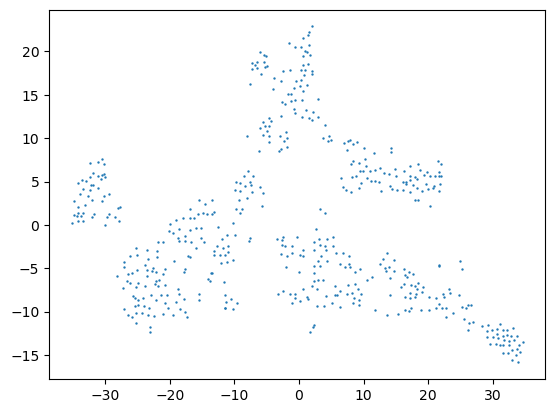

In [20]:
plt.figure()
plt.scatter(u[:,0],u[:,1],s=0.5)
plt.show()

In [21]:
from sklearn.ensemble import IsolationForest

ifor = IsolationForest(n_estimators=1000, contamination="auto")
pred = ifor.fit_predict(x)

In [22]:
scores = ifor.decision_function(x)
ind = np.argsort(scores)
x_sorted = x[ind]

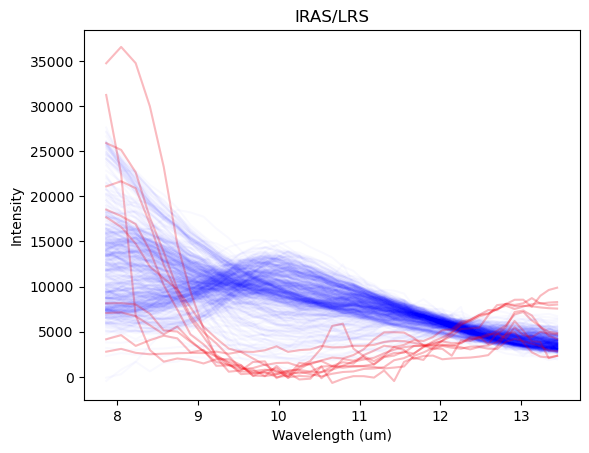

In [23]:
plt.figure()
plt.title("IRAS/LRS")
plt.xlabel("Wavelength (um)")
plt.ylabel("Intensity")
for i in range(x.shape[0]):
    plt.plot(wl, x[i], alpha=0.025, color='blue')
for i in range(10):
    plt.plot(wl, x_sorted[i], alpha=0.25, color='red')
plt.show()

In [24]:
z_sorted = pca.transform(x_sorted)

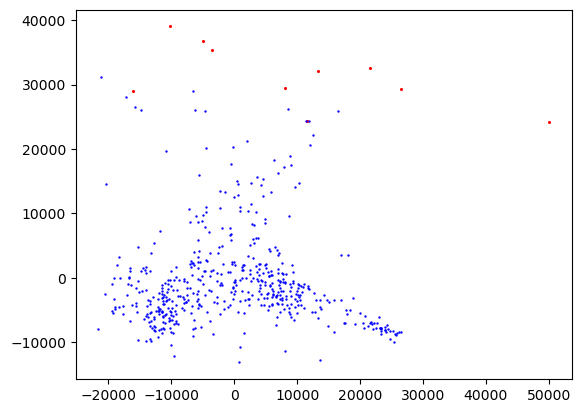

In [25]:
plt.figure()
plt.scatter(z_sorted[:10,0],z_sorted[:10,1],s=1.5,color='red')
plt.scatter(z_sorted[10:,0],z_sorted[10:,1],s=0.5,color='blue')
plt.show()

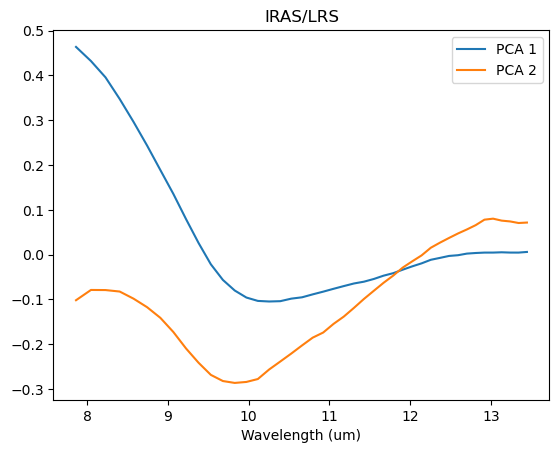

In [26]:
plt.title("IRAS/LRS")
plt.xlabel("Wavelength (um)")
plt.plot(wl, pca.components_[0,:], "-", label='PCA 1')
plt.plot(wl, pca.components_[1,:], "-", label='PCA 2')
plt.legend()
plt.show()